<a href="https://colab.research.google.com/github/nargyanti/PCVK_Genap_2022/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Gamma correction on image
-----------------------
Input gamma value: 3


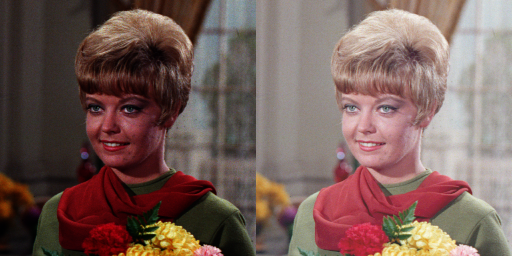

In [ ]:
print('Gamma correction on image')
print('-----------------------')

# Get gamma value from input
try:
  gamma = int(input('Input gamma value: '))
except ValueError:
  print('Error, not a number')

# Import image
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

# Access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y, x, c] = 255 * (original[y, x, c]/255)**(1/gamma) # Gamma correction

# Show image
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Bit depth
-----------------------
Input bit depth value: 2


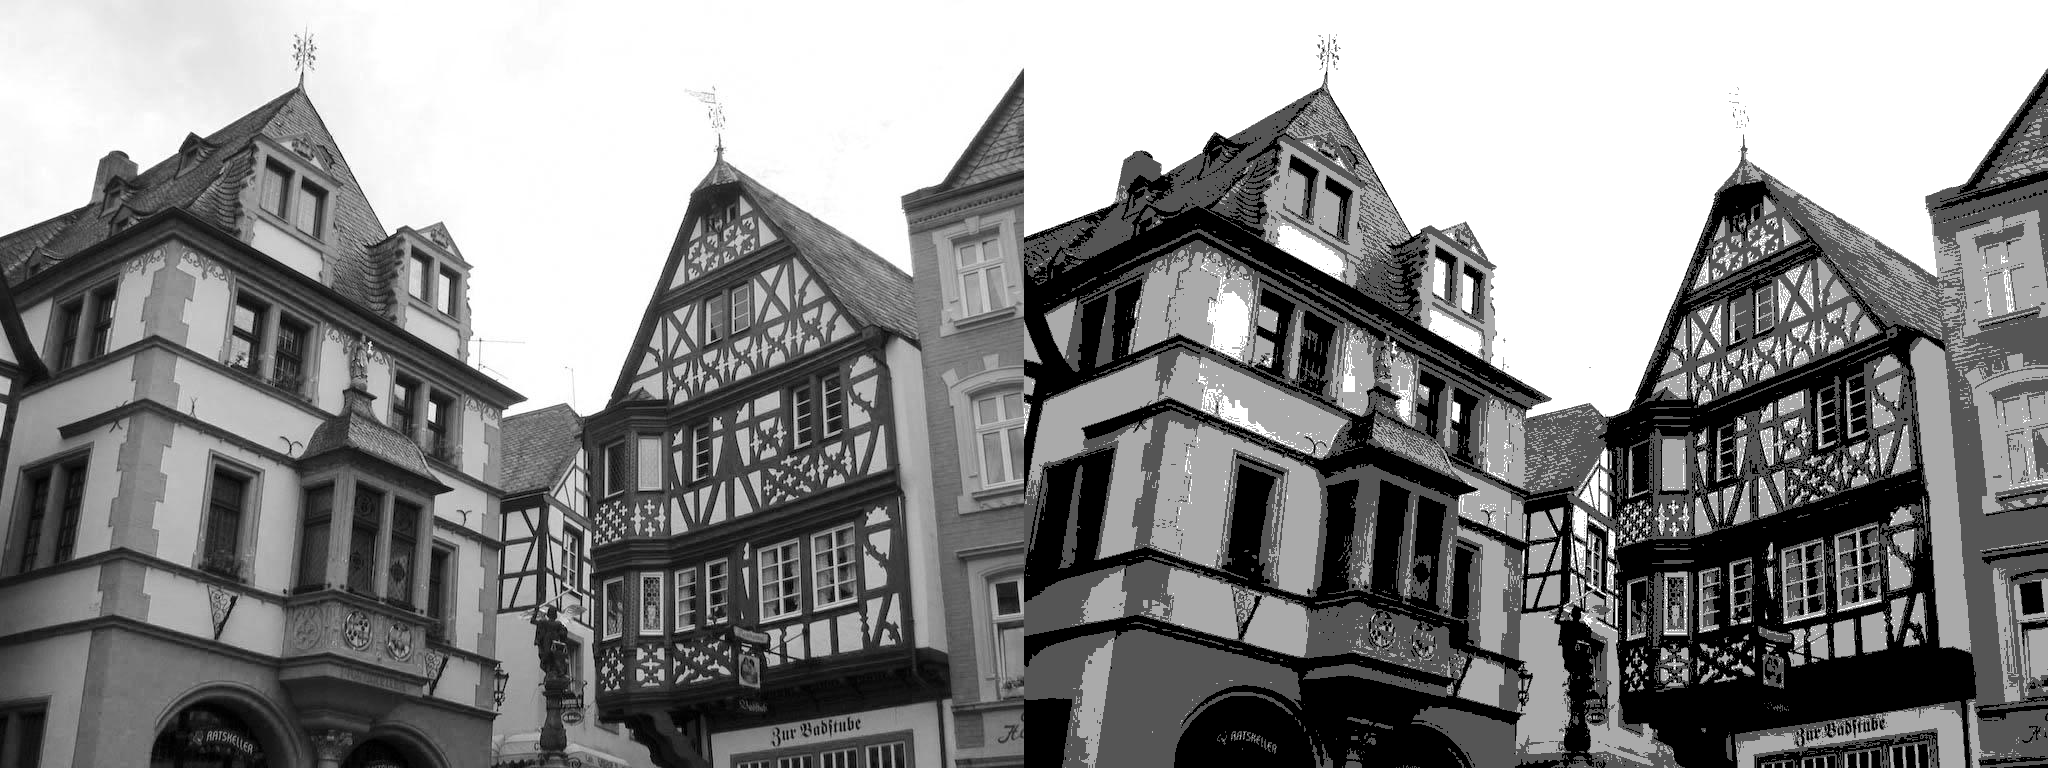

In [ ]:
print('Bit depth')
print('-----------------------')

# Get bit depth from input
try:
  bit_depth = int(input('Input bit depth value: '))
except ValueError:
  print('Error, not a number')

# Import image
original = cv.imread('/content/drive/MyDrive/PCVK/old_house.jpg')
bit_depth_image = np.zeros(original.shape, original.dtype)

# Formula for change the color
def change_bit_depth(bit_depth, original):  
  divider = 256 / (2**bit_depth)
  return (original // divider)/(2**bit_depth - 1) * 255

# access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):         
      bit_depth_image[y, x, c] = change_bit_depth(bit_depth, original[y, x, c]) # Change the color 

# Show image
final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

Bit depth
-----------------------
Input bit depth value: 2


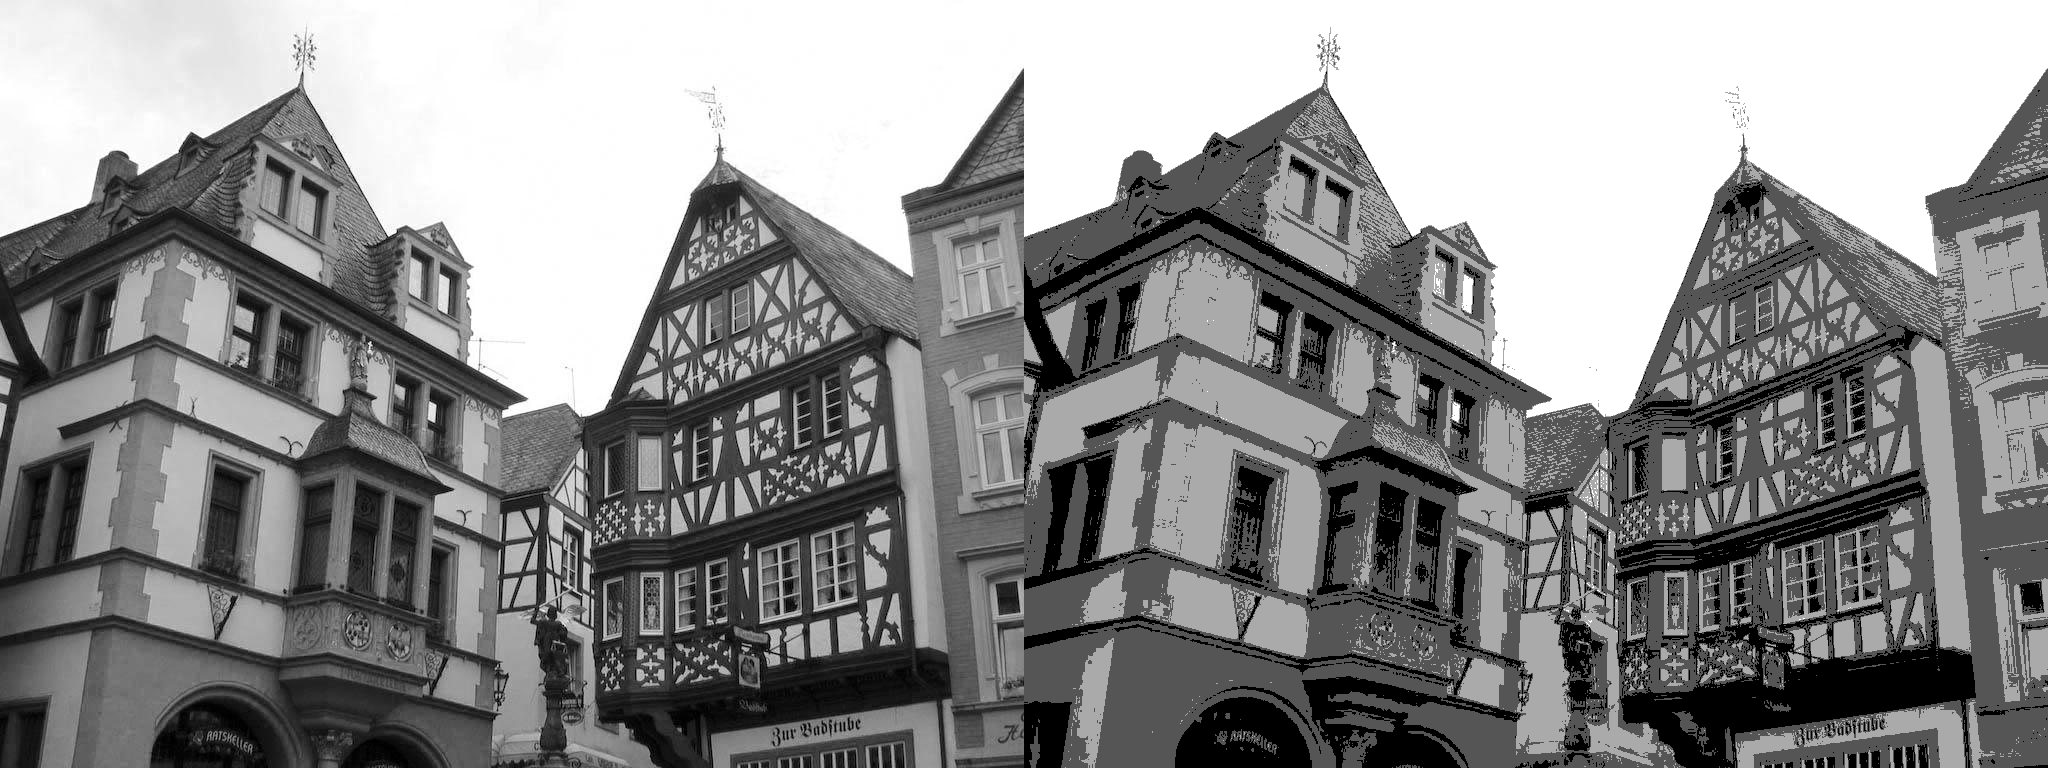

In [ ]:
print('Bit depth')
print('-----------------------')

# Get bit depth from input
try:
  bit_depth = int(input('Input bit depth value: '))
except ValueError:
  print('Error, not a number')

# Import image
original = cv.imread('/content/drive/MyDrive/PCVK/old_house.jpg')
bit_depth_image = np.zeros(original.shape, original.dtype)

# Get the level of color
def level(bit_depth, original):
  return 255/((2**(bit_depth))-1)

# Access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):         
      bit_depth_image[y, x, c] = round(original[y, x, c]/level(bit_depth, original[y, x, c])) * level(bit_depth, original[y, x, c]) # Change the color

# Show image
final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

Average denoising module
-----------------------
Input image amount: 100


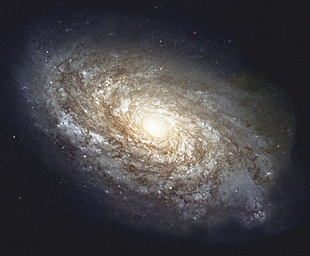

PSNR value is 27.370931279516654 dB


In [ ]:
import glob
from math import log10, sqrt

print('Average denoising module')
print('-----------------------')

# Get image amount from input
try:
  img_amount = int(input('Input image amount: '))
except ValueError:
  print('Error, not a number')

# PSNR
def PSNR(original, compressed):
  mse = np.mean((original - compressed) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

# Import image
original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
average_denoising_image = np.zeros(original.shape, original.dtype)

# Append image to array
cv_img = []
for i in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(i)
  cv_img.append(n)

# Averaging the image pixel
average_denoising_image = np.mean(cv_img[:img_amount], axis=0).astype(np.uint8)

# Show image
final_frame = cv.hconcat((original, average_denoising_image))
# cv2_imshow(final_frame)
cv2_imshow(average_denoising_image)

# Calculate PSNR
value = PSNR(original, average_denoising_image)
print(f"PSNR value is {value} dB")  

Image masking - OR
-----------------------


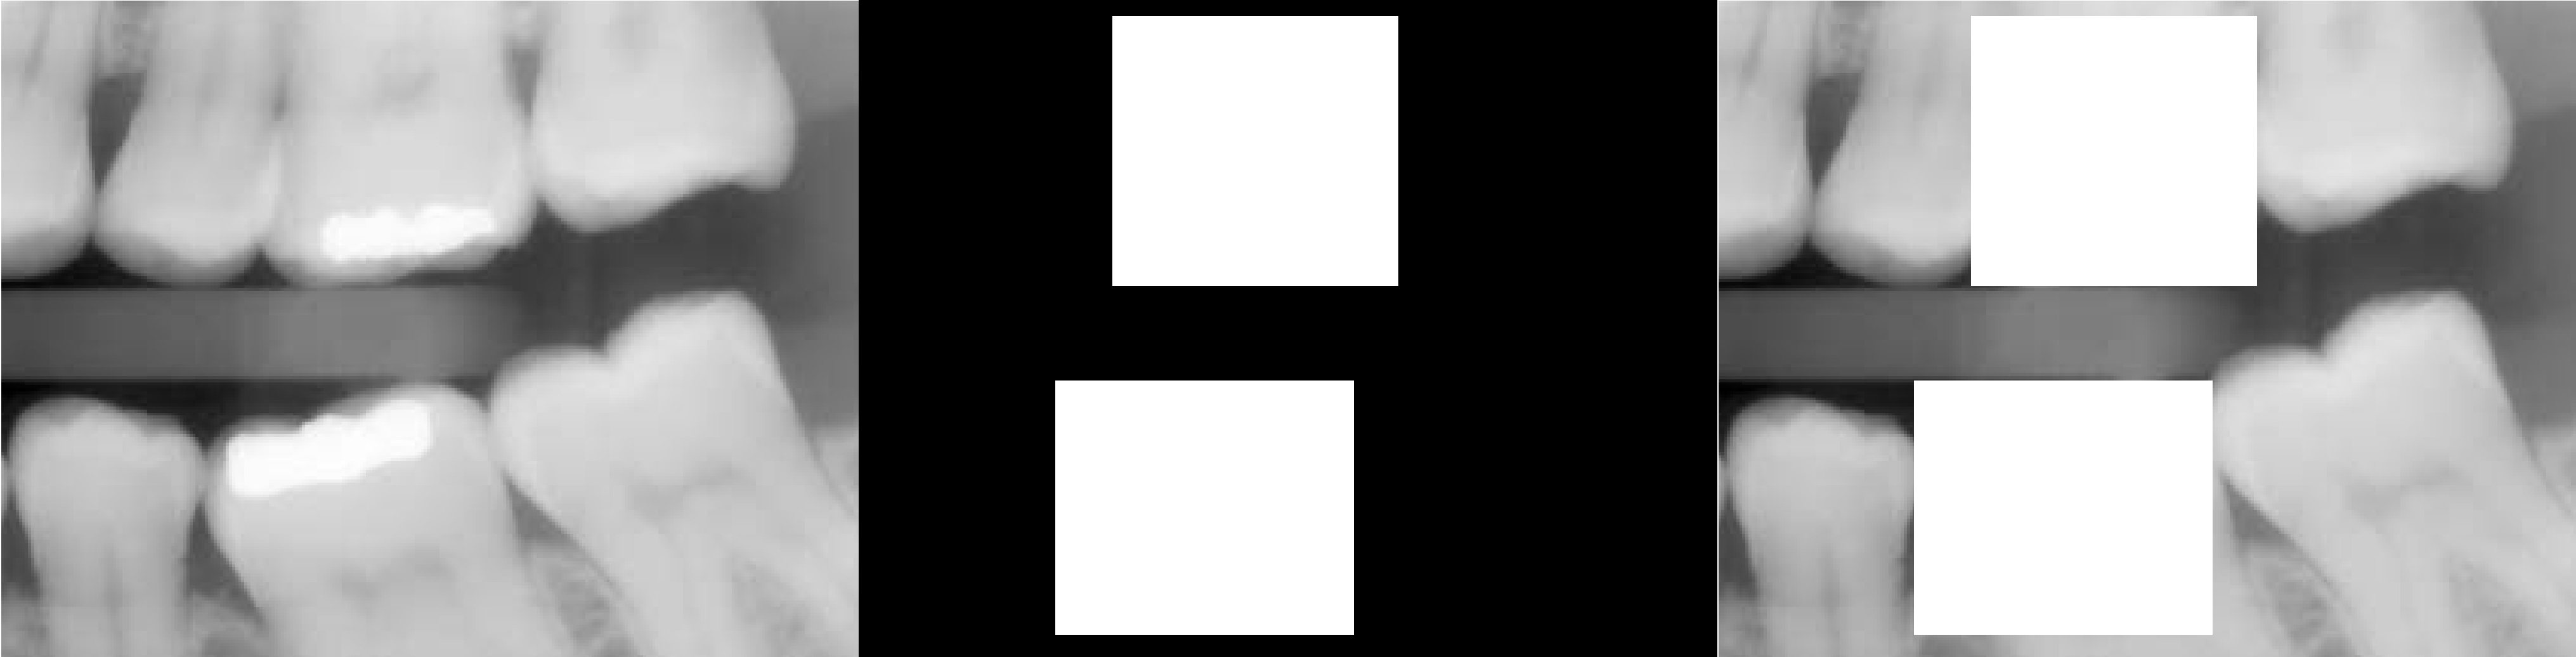

In [ ]:
print('Image masking - OR')
print('-----------------------')

# Import image
original = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')
blank_image = np.zeros(original.shape, original.dtype)
cv.rectangle(blank_image, pt1=(400, 25), pt2=(850,450), color=(255,255,255), thickness=-1)
cv.rectangle(blank_image, pt1=(310, 600), pt2=(780,1000), color=(255,255,255), thickness=-1)

# Averaging the image pixel
masking_or_image = original | blank_image

# Show image
final_frame = cv.hconcat((original, blank_image, masking_or_image))
cv2_imshow(final_frame)
# plt.imshow(final_frame)

Image masking - NOT
-----------------------


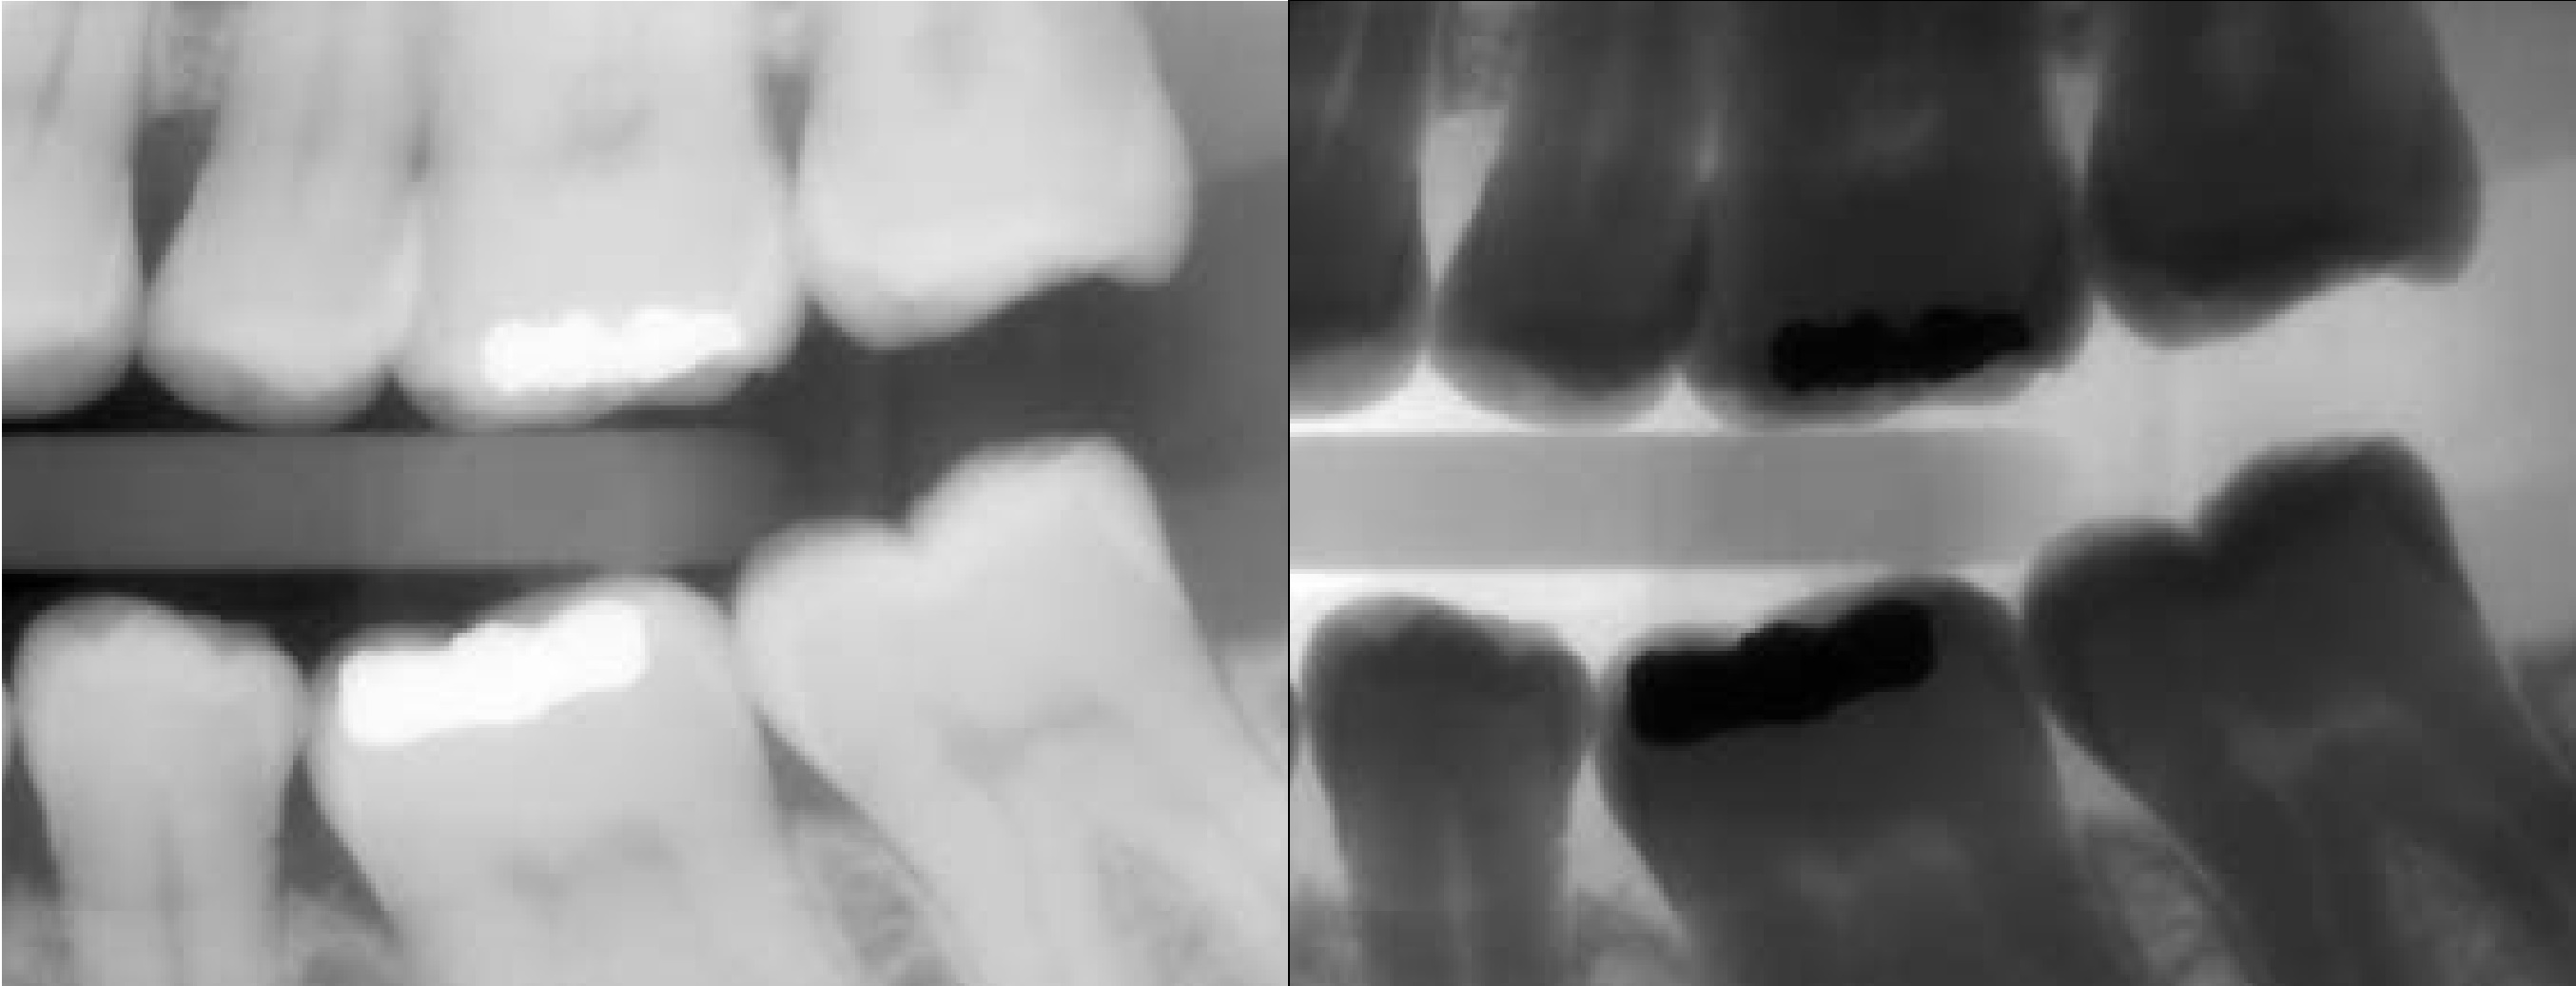

In [ ]:
print('Image masking - NOT')
print('-----------------------')

# Import image
original = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')
blank_image = np.zeros(original.shape, original.dtype)
cv.rectangle(blank_image, pt1=(400, 25), pt2=(850,450), color=(255,255,255), thickness=-1)
cv.rectangle(blank_image, pt1=(310, 600), pt2=(780,1000), color=(255,255,255), thickness=-1)

# Averaging the image pixel
masking_not_image = ~original

# Show image
final_frame = cv.hconcat((original, masking_not_image))
cv2_imshow(final_frame)
# plt.imshow(final_frame)

Image masking - NAND
-----------------------


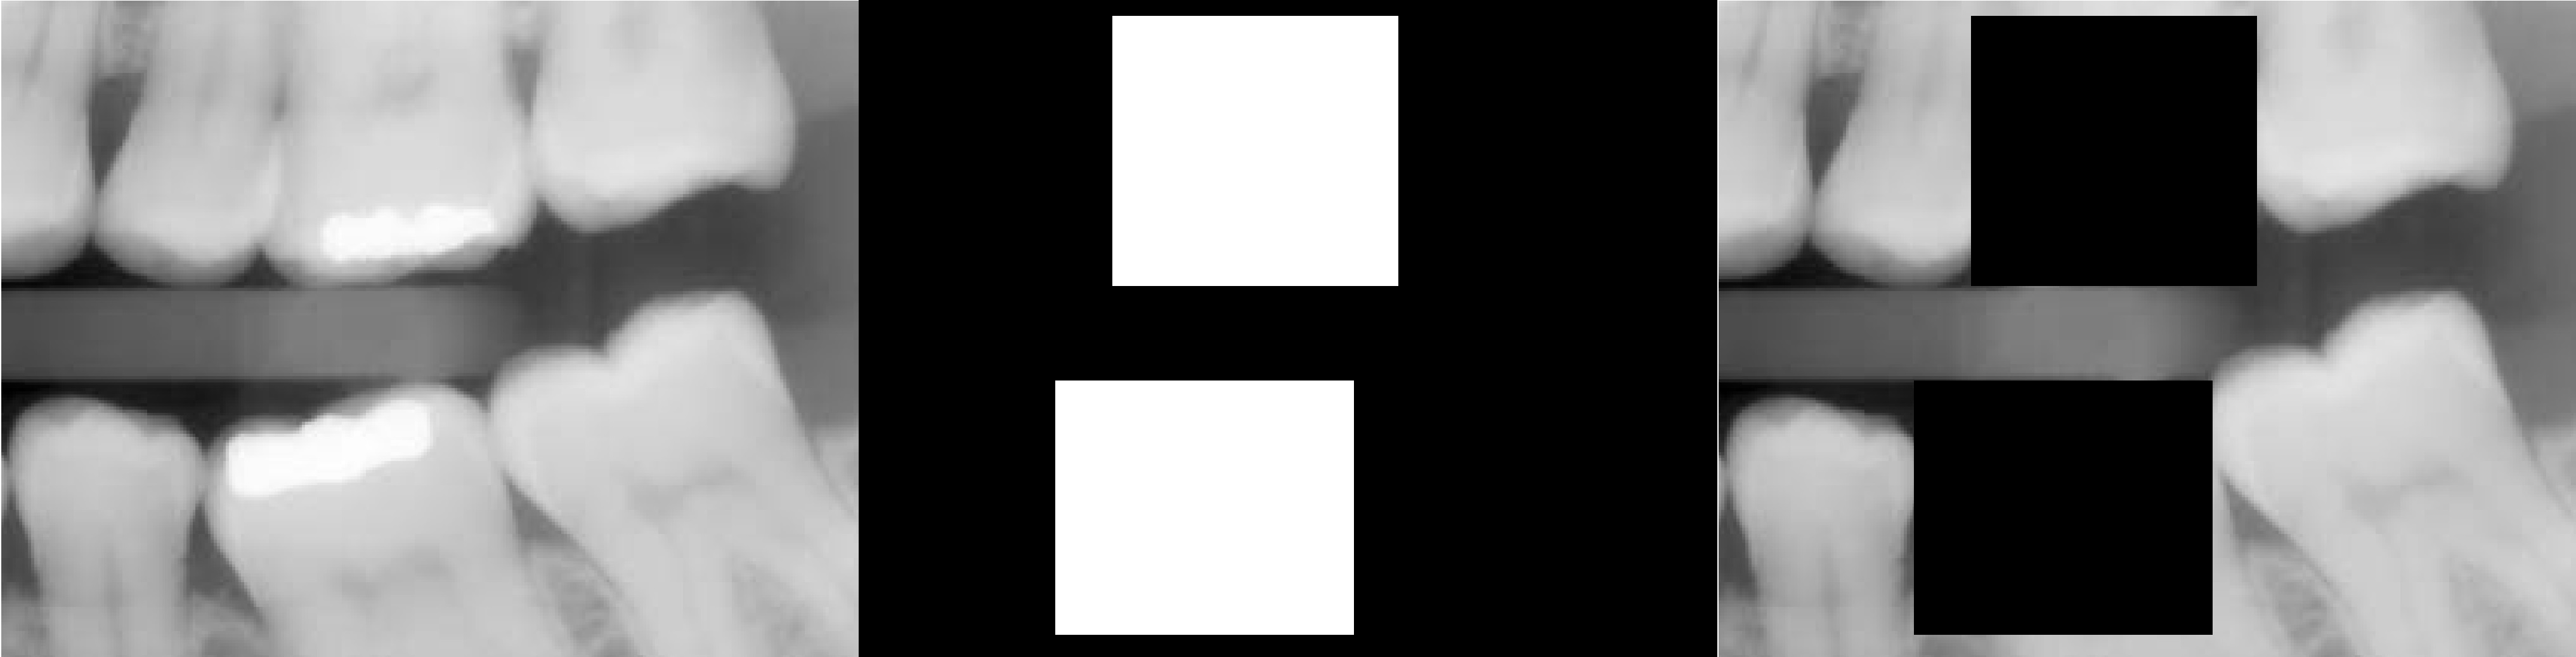

In [ ]:
print('Image masking - NAND')
print('-----------------------')

# Import image
original = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')
blank_image = np.zeros(original.shape, original.dtype)
cv.rectangle(blank_image, pt1=(400, 25), pt2=(850,450), color=(255,255,255), thickness=-1)
cv.rectangle(blank_image, pt1=(310, 600), pt2=(780,1000), color=(255,255,255), thickness=-1)

# Averaging the image pixel
masking_nand_image = original & ~blank_image

# Show image
final_frame = cv.hconcat((original, blank_image, masking_nand_image))
cv2_imshow(final_frame)
# plt.imshow(final_frame)

Image masking - XOR
-----------------------


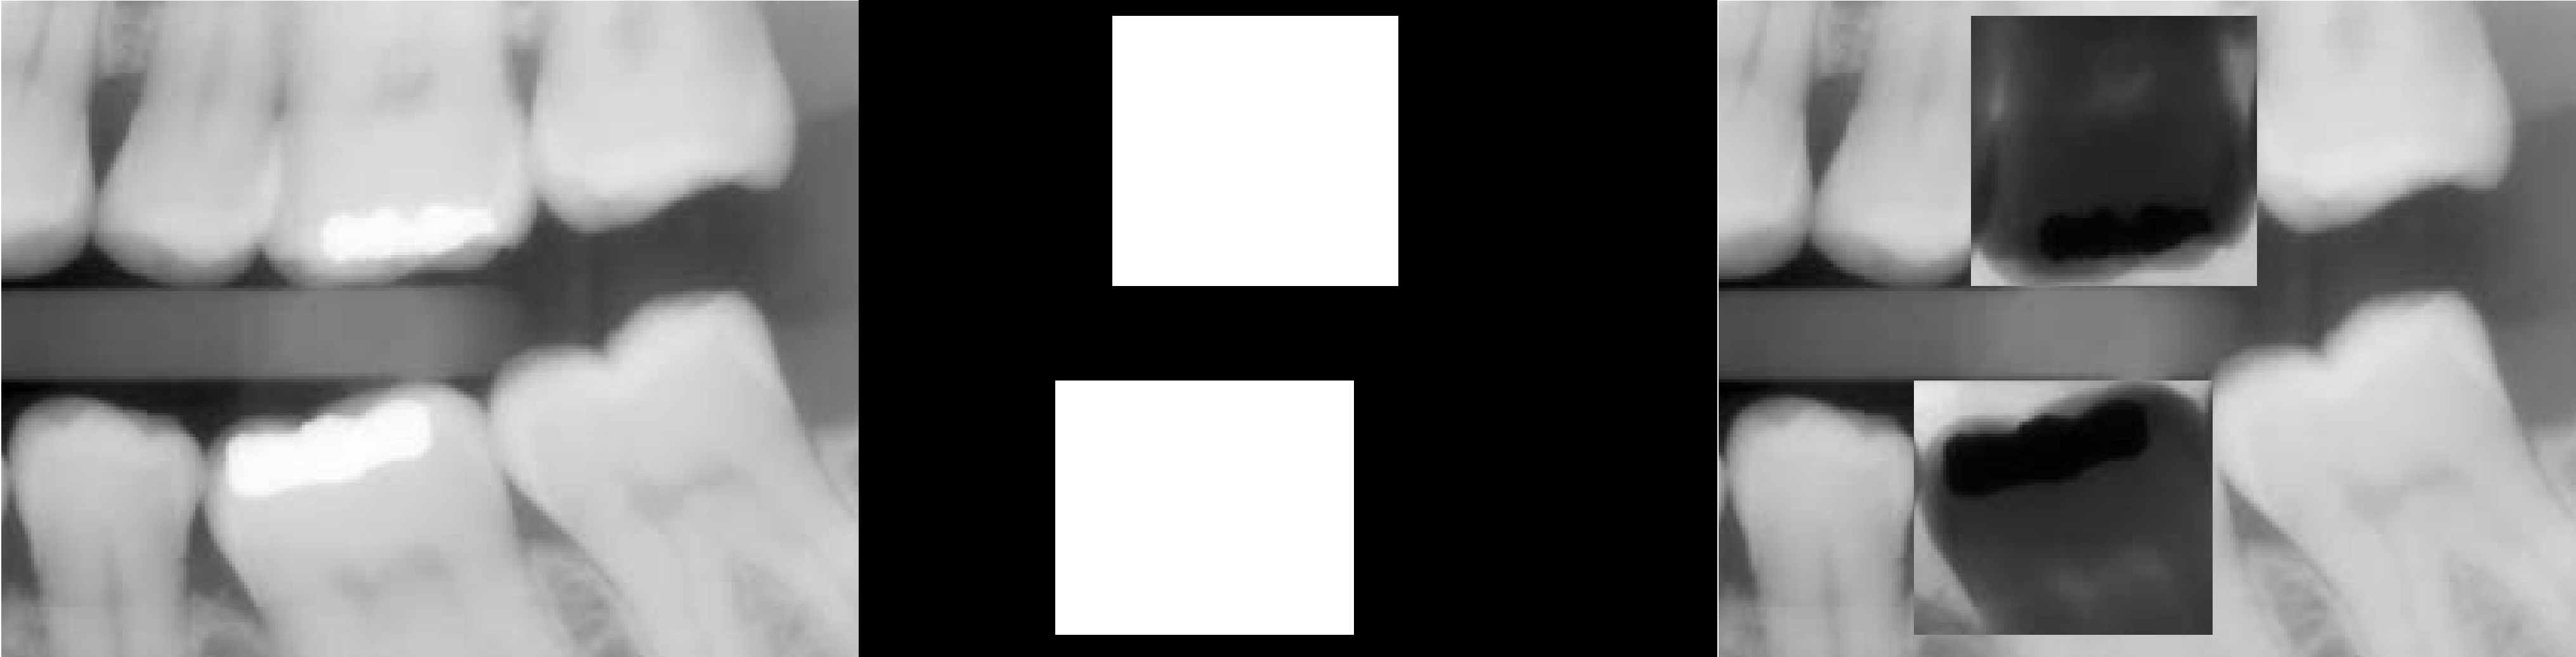

In [ ]:
print('Image masking - XOR')
print('-----------------------')

# Import image
original = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')
blank_image = np.zeros(original.shape, original.dtype)
cv.rectangle(blank_image, pt1=(400, 25), pt2=(850,450), color=(255,255,255), thickness=-1)
cv.rectangle(blank_image, pt1=(310, 600), pt2=(780,1000), color=(255,255,255), thickness=-1)

# Averaging the image pixel
masking_xor_image = original ^ blank_image

# Show image
final_frame = cv.hconcat((original, blank_image, masking_xor_image))
cv2_imshow(final_frame)
# plt.imshow(final_frame)

Image masking - AND
-----------------------


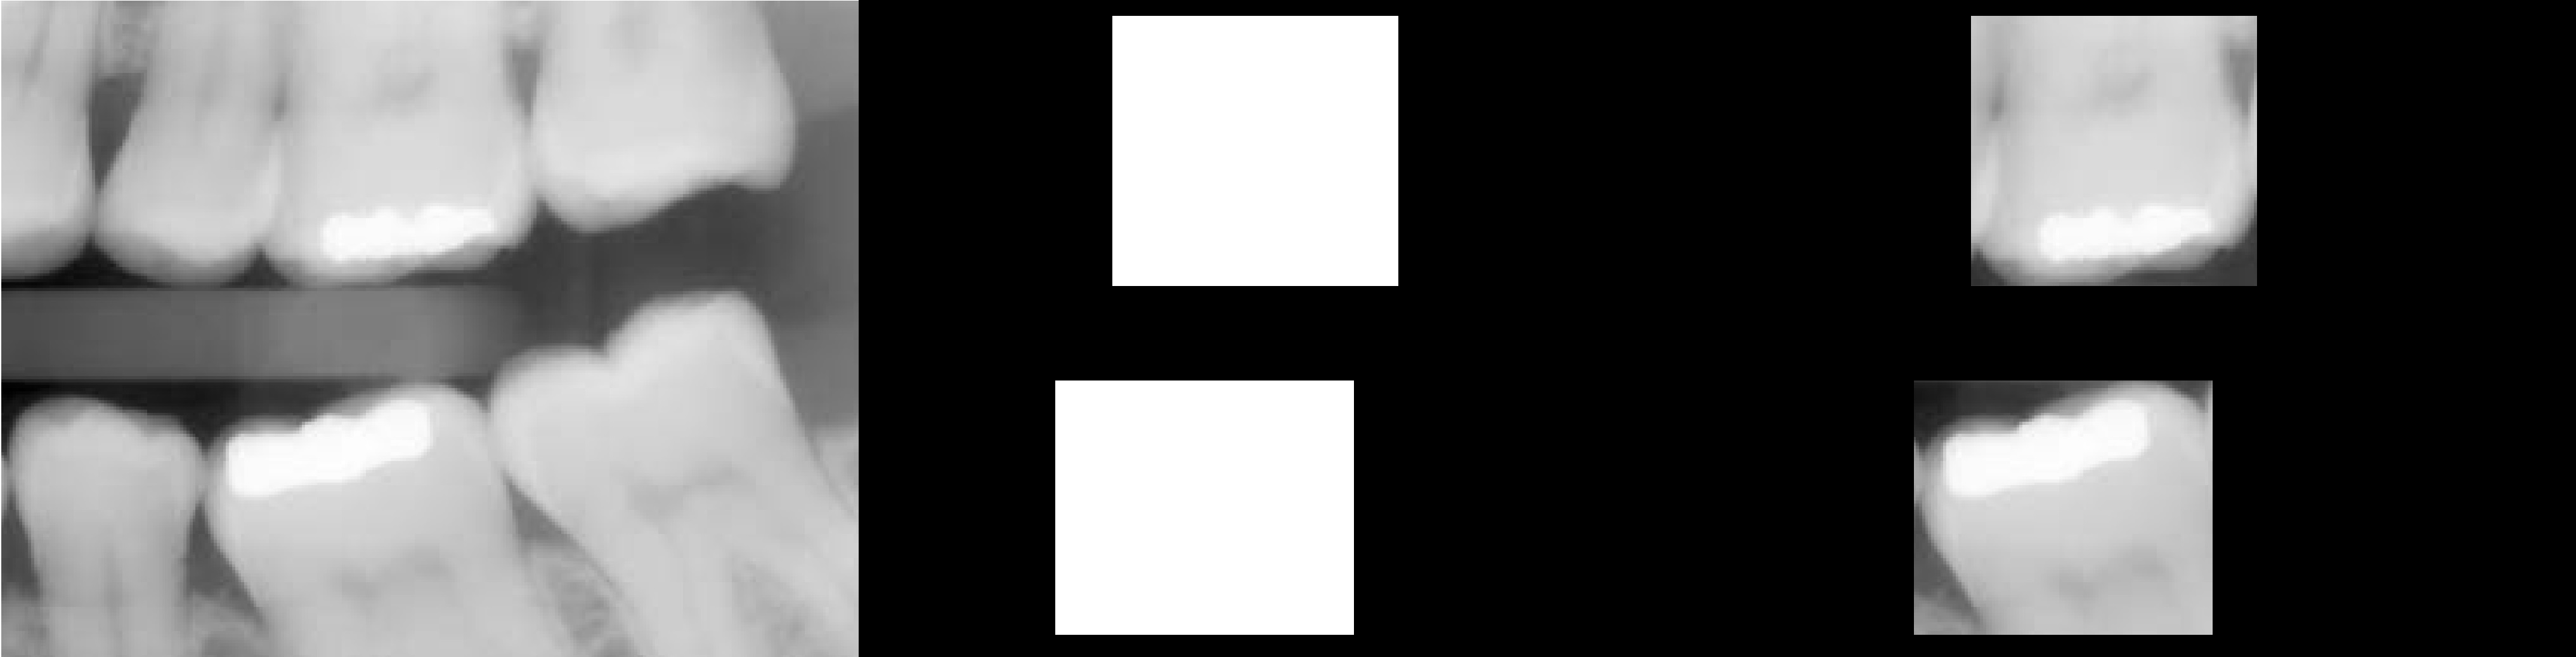

In [5]:
print('Image masking - AND')
print('-----------------------')

# Import image
original = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')
blank_image = np.zeros(original.shape, original.dtype)
cv.rectangle(blank_image, pt1=(400, 25), pt2=(850,450), color=(255,255,255), thickness=-1)
cv.rectangle(blank_image, pt1=(310, 600), pt2=(780,1000), color=(255,255,255), thickness=-1)

# Averaging the image pixel
masking_and_image = original & blank_image

# Show image
final_frame = cv.hconcat((original, blank_image, masking_and_image))
cv2_imshow(final_frame)
# plt.imshow(final_frame)